# COVID-19 in Prisons

This notebook pulls together data from the the UCLA COVID-19 Behind Bars dataset, the Bureau of Justice Statistics, and the Marshall Project's dataset tracking COVID-19 infections in staff and inmates. We then prepare the data for machine learning analysis. 

## Identifying Prison Conditions, by State

### From the UCLA COVID-19 Behind Bars dataset, identifying and cleaning the policies prisons have put in place to align with social distance recommendations, and support prisoner mental health as a result of the isolation. 
### From the same dataset, identifying the pre-COVID-19 incarcerated population. 
### From the Bureau of Justice Statistics, identifying prison capacity (as of 2018) and incarcerated population (as of 2018). 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import re
import prison_conditions_wrangle as pcw
import clean_data

### First, extracting the prison population of each state prior to any COVID-19 releases.

In [3]:
#Read in the data
population = pcw.import_clean_data('../data/may_19/ucla_0519_COVID19_related_prison_releases.csv')

population.head(5)

,state,facility,authorizing_agent,known_capacity_\n(if_available),population_prior_to_releases,overall_pop._reduction_/_\ntotal_number_of_releases,does_the_source_report_this_reduction_as_a_result_of_releases_only_or_a_mix_of_releases/policy_changes,does_the_source_give_a_more_detailed_breakdown_on_the_releases,breakdown_of_releases:\nparole_tech_violation_,breakdown_of_releases:\nlower_level/_non-violent_crimes,breakdown_of_releases:_\nshort_time_left_on_sentence,breakdown_of_releases:\nvulnerable_populations,breakdown_of_releases:_\nother_(please_explain),date,legal_filing,source(s),"additional_notes_(explaining_""other""_column,_defining_vulnerable_populations_in_this_instance,_etc.)",unnamed:_17,unnamed:_18,unnamed:_19
0,NaN,NaN,NaN,NaN,623877,24356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Statewide,Governor,NaN,NaN,Unknown,Releases only,Yes - See columns I-M,x,NaN,NaN,NaN,x,2020-04-02,No,https://www.wsfa.com/2020/04/02/ivey-order-all...,County jail releases only (no prisons); focus ...,NaN,NaN,NaN
2,Arkansas,Statewide,Parole Board/Gov,NaN,NaN,300,Releases only,No,NaN,NaN,NaN,NaN,x,2020-05-12,NaN,https://www.nwahomepage.com/lifestyle/health/c...,First 300 released. 1234 approved by Parole Bo...,NaN,NaN,NaN
3,California,Statewide,CDCR,NaN,114000,3418,Releases only,Yes - See columns I-M,NaN,x,x,NaN,NaN,2020-04-13,Yes,https://www.courtlistener.com/recap/gov.uscour...,This is a declaration opposing further relief ...,NaN,NaN,NaN
4,Colorado,Statwide,Governor,NaN,20000,3500,Mix,Yes - See columns I-M,NaN,NaN,x,x,NaN,2020-04-23,No,https://www.cpr.org/2020/04/23/colorado-correc...,150 people released due to early release for m...,NaN,NaN,NaN


In [4]:
population = population.dropna(subset=["state", "population_prior_to_releases"])
population = pcw.clean_str_cols(population, ["state"])
population = pcw.clean_numeric_cols(population, ["population_prior_to_releases"])

In [5]:
population.shape

(22, 20)

In [6]:
population.head()

,state,facility,authorizing_agent,known_capacity_\n(if_available),population_prior_to_releases,overall_pop._reduction_/_\ntotal_number_of_releases,does_the_source_report_this_reduction_as_a_result_of_releases_only_or_a_mix_of_releases/policy_changes,does_the_source_give_a_more_detailed_breakdown_on_the_releases,breakdown_of_releases:\nparole_tech_violation_,breakdown_of_releases:\nlower_level/_non-violent_crimes,breakdown_of_releases:_\nshort_time_left_on_sentence,breakdown_of_releases:\nvulnerable_populations,breakdown_of_releases:_\nother_(please_explain),date,legal_filing,source(s),"additional_notes_(explaining_""other""_column,_defining_vulnerable_populations_in_this_instance,_etc.)",unnamed:_17,unnamed:_18,unnamed:_19
3,california,Statewide,CDCR,NaN,114000.0,3418,Releases only,Yes - See columns I-M,NaN,x,x,NaN,NaN,2020-04-13,Yes,https://www.courtlistener.com/recap/gov.uscour...,This is a declaration opposing further relief ...,NaN,NaN,NaN
4,colorado,Statwide,Governor,NaN,20000.0,3500,Mix,Yes - See columns I-M,NaN,NaN,x,x,NaN,2020-04-23,No,https://www.cpr.org/2020/04/23/colorado-correc...,150 people released due to early release for m...,NaN,NaN,NaN
6,federal bop,Nationwide,AG,NaN,174000.0,1440,Releases only,Yes - See columns I-M,NaN,x,NaN,x,NaN,2020-04-22,No,https://www.politico.com/amp/news/2020/04/22/c...,Number as of 4.22.20; (As of 4/6/20: 886 had...,NaN,NaN,NaN
9,hawaii,statewide,courts,NaN,2189.0,823,Releases only,No,NaN,NaN,NaN,NaN,NaN,2020-05-09,Yes,https://www.staradvertiser.com/2020/05/09/hawa...,This article reports a reduction of 832. Anoth...,afc,NaN,NaN
10,illinois,Decatur,NaN,NaN,NaN,6,Releases only,Yes - See columns I-M,NaN,NaN,NaN,NaN,x,2020-03-29,NaN,https://www.chicagotribune.com/coronavirus/ct-...,Mothers and newborns,NaN,NaN,NaN


In [7]:
#Select on the necessary columns; drop any rows that don't have a population
prison_pop = pcw.select_columns(population, features=["state", "population_prior_to_releases"])
prison_pop = prison_pop.dropna()

prison_pop

,state,population_prior_to_releases
3,california,114000.0
4,colorado,20000.0
6,federal bop,174000.0
9,hawaii,2189.0
11,illinois,37000.0
13,iowa,8519.0
14,kentucky,12240.0
16,maine,2240.0
17,maryland,19050.0
19,massachusetts,7697.0


The dataframe above shows the population of the prison prior to releases. Some of the states are missing data.

### Second, extracting any social distance policies in place in prisons, as well as mitigation policies to attempt to alleviate the effects of isolation on prisoners.

In [8]:
policies = pcw.import_clean_data('../data/may_19/ucla_0519_visitation_policy_by_state.csv')

policies.head(5)

,state,suspended_visitations,explicitly_allows_lawyer_access,compensatory_remote_access_(phone),compensatory_remote_access_(video),effective_date,length,source(s),"additional_notes_(related_activity_suspensions,_explanation_of_compensatory_access,_waivers,_etc.)"
0,Alabama,X,NaN,x,NaN,2020-03-13,30 days,https://www.waaytv.com/content/coronavirus-con...,"also suspended volunteer entry, medical co-pay..."
1,Alaska,X,NaN,X,NaN,2020-03-13,NaN,https://doc.alaska.gov/covid-19,2 free 15-minute calls/week (effective 3/19/20...
2,Arizona,X,NaN,X,NaN,2020-03-13,30 days,https://corrections.az.gov/sites/default/files...,2 x 15 min. calls/wk in addition to normal pho...
3,Arkansas,X,NaN,X,X,2020-03-16,21 days,https://adc.arkansas.gov/images/uploads/COVID_...,Price of phone calls reduced; no connect fee o...
4,California,X,X,X,NaN,2020-03-14,NaN,https://www.cdcr.ca.gov/covid19/,"Beginning March 27, staff and visitors enteri..."


In [9]:
policies = policies.dropna(subset=["state"])
policies = pcw.clean_str_cols(policies, ["state"])

In [10]:
preset_dummies = ["suspended_visitations", "explicitly_allows_lawyer_access", "compensatory_remote_access_(phone)", 
                "compensatory_remote_access_(video)"]
new_cols = ["no_visits", "lawyer_access", "phone_access", "video_access"]

policies = pcw.transform_dummy_cols(policies, preset_dummies, new_cols)

In [11]:
#Show the wide variety of policies in place.

for val in policies["additional_notes_(related_activity_suspensions,_explanation_of_compensatory_access,_waivers,_etc.)"].unique():
    print(val)

also suspended volunteer entry, medical co-pays; 3/18: announced compensatory free 15 min phone call once per week 
2 free 15-minute calls/week (effective 3/19/2020). 
2 x 15 min. calls/wk in addition to normal phone call policies/written letter policies. However, all legal and non-legal visitation is suspended (as of 3/18)
Price of phone calls reduced; no connect fee on telephone calls: 15 cents per minute (Div. of Correction & Div. of Community Correction facilities). Video visitation: $2.50 for 30-min visit (state prisons); 15 cents/min for video visits at community correction centers. Rates take effect 03/20/20 (until further notice). Marshall Project: "Legal visits may be granted on a case-by-case basis."
 Beginning March 27, staff and visitors entering CDCR state prisons and community correctional facilities will undergo an additional touchless temperature screening before entering the facility in addition to the ongoing verbal symptom screening put in place on March 14th. Any no

In [12]:
policies = pcw.encode_policies_str(policies, 
                      "additional_notes_(related_activity_suspensions,_explanation_of_compensatory_access,_waivers,_etc.)")

In [13]:
distance_policies = pcw.select_columns(policies)

In [14]:
distance_policies.head(5)

,state,effective_date,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support
0,alabama,2020-03-13,1,0,1,0,1,0,0,1
1,alaska,2020-03-13,1,0,1,0,0,0,0,0
2,arizona,2020-03-13,1,0,1,0,0,0,0,0
3,arkansas,2020-03-16,1,0,1,1,0,0,0,0
4,california,2020-03-14,1,1,1,0,0,1,1,0


The dataframe above shows the policies in place in a given state, and the effective date of those policies, based on the UCLA dataset. 

### Third, extracting prison capacity and populaton (from the end of 2018) from the Bureau of Justice Statistics

Note on the below cell: I was having encoding errors reading my CSV. This [stack overflow post](https://stackoverflow.com/questions/54133455/importing-csv-using-pd-read-csv-invalid-start-byte-error) provided the solution above. 

In [15]:
import chardet    
rawdata = open('../data/prison_capacity_2018_state.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [16]:
#Read in the data; the file is formatted differently than the others, so we parse by hand
capacity = pd.read_csv('../data/prison_capacity_2018_state.csv', engine="python", header=11, skiprows=[12, 13], skipfooter=12,
                       encoding="Windows-1252")
capacity.columns = capacity.columns.str.lower()
capacity.columns = capacity.columns.str.replace(" ", "_")
capacity.rename(columns={'unnamed:_1': 'state'}, inplace=True)

capacity = pcw.select_columns(capacity, ["state", "rated", "operational", "custody_population"])

capacity.head(5)

,state,rated,operational,custody_population
0,Alabama/b,...,"22,176","20,875"
1,Alaska/c,"4,838",/,"4,235"
2,Arizona/d,"39,714","41,447","41,937"
3,Arkansas,"16,081","16,120","15,578"
4,California,/,"122,302","117,937"


In [17]:
capacity = pcw.clean_str_cols(capacity, ["state"])
capacity = pcw.clean_numeric_cols(capacity, ["rated", "operational", "custody_population"])

In [18]:
# The operational capacity is the default for a prison capacity - this is the capacity of a state based on staffing and 
# services. The rated capacity is the capacity as established by a rating official. The custody population is the number
# of people actually incarcerated. For details on the get_capacity() function, see the prison_conditions_wrangle module
capacity = pcw.get_cap_pct(capacity, "operational", ["rated", "custody_population"])

In [19]:
prison_capacity = pcw.select_columns(capacity, ["state", "custody_population", "capacity", "pct_occup"])

In [20]:
prison_capacity.head()

,state,custody_population,capacity,pct_occup
0,alabama,20875,22176.0,0.941333
1,alaska,4235,4838.0,0.875362
2,arizona,41937,41447.0,1.011822
3,arkansas,15578,16120.0,0.966377
4,california,117937,122302.0,0.964310


The final dataframe shows the custody population, capacity, and percent occupancy by state, as of 2018.

### Finally, merging all the dataframes together for a summary of prison conditions.

In [21]:
policies_and_pop = prison_capacity.merge(distance_policies, how="outer", on="state")
prison_conditions = prison_pop.merge(policies_and_pop, how="outer", on="state")
prison_conditions.rename(columns={"custody_population":"pop_2018","population_prior_to_releases":"pop_2020"}, inplace=True)

prison_conditions["pop_2020"].fillna(prison_conditions["pop_2018"], inplace=True)

In [22]:
prison_conditions

,state,pop_2020,pop_2018,capacity,pct_occup,effective_date,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support
0,california,114000.0,117937.0,122302.0,0.964310,2020-03-14,1,1,1,0,0,1,1,0
1,colorado,20000.0,16086.0,14738.0,1.091464,2020-03-11,1,1,0,0,1,1,0,0
2,federal bop,174000.0,NaN,NaN,NaN,2020-03-13,1,0,1,1,1,1,0,0
3,hawaii,2189.0,3527.0,3527.0,1.000000,2020-03-13,1,1,0,0,0,0,0,0
4,illinois,37000.0,39392.0,51329.0,0.767441,2020-03-14,1,1,1,1,0,0,0,0
5,iowa,8519.0,8559.0,6934.0,1.234352,2020-03-14,1,0,0,0,1,0,0,0
6,kentucky,12240.0,12290.0,12784.0,0.961358,2020-03-14,1,1,1,0,0,0,0,0
7,maine,2240.0,2384.0,2591.0,0.920108,2020-03-14,1,0,0,0,0,0,0,0
8,maryland,19050.0,19180.0,21072.0,0.910213,2020-03-12,1,1,0,0,1,0,0,0
9,massachusetts,7697.0,8454.0,10208.0,0.828174,2020-03-12,1,1,0,0,0,0,0,0


## Merging Prison Conditions Data with Marshall Project data

The Marshall Project compiles data on the prevalence of coronavirus infection in prisons across the country the data is downloadable on their GitHub repository: [https://github.com/themarshallproject/COVID_prison_data]. 

In [23]:
# Download the Marshall data and assign data types.
demographics = ['state', 'pop_2020', 'pop_2018', 'capacity', 'pct_occup']
policies = ['no_visits', 'lawyer_access', 'phone_access', 'video_access', 'no_volunteers', 'limiting_movement', 'screening',
                'healthcare_support']

marshall_dtypes = {'name': str,
                   'total_staff_cases': 'Int64',
                   'total_prisoner_cases': 'Int64',
                   'total_staff_deaths': 'Int64',
                   'total_prisoner_deaths': 'Int64',
                   'as_of_date': str}

marshall = pd.read_csv('https://raw.githubusercontent.com/themarshallproject/COVID_prison_data/master/data/covid_prison_cases.csv')

prison_conditions.replace('federal bop', 'federal', inplace=True)

marshall['as_of_date'] = pd.to_datetime(marshall['as_of_date'],
                                            format='%Y-%m-%d')
marshall['lower_name'] = marshall['name'].str.lower()

marshall.sort_values(by='as_of_date', inplace=True)
marshall.head(5)

,name,abbreviation,staff_tests,staff_tests_with_multiples,prisoner_tests,prisoner_tests_with_multiples,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,notes,lower_name
466,Delaware,DE,NaN,NaN,4.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,2020-03-24,NaN,delaware
471,Illinois,IL,NaN,NaN,13.0,NaN,3.0,3.0,NaN,NaN,0.0,0.0,2020-03-25,NaN,illinois
481,Minnesota,MN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,2020-03-26,NaN,minnesota
480,Michigan,MI,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,0.0,0.0,2020-03-26,NaN,michigan
479,Massachusetts,MA,NaN,NaN,NaN,NaN,4.0,9.0,NaN,NaN,0.0,0.0,2020-03-26,NaN,massachusetts


Once the Marshall Project data is loaded, populate the state's prison policies. Looping through each state, identify rows where the reported date is after the COVID-related policies are enacted. Update the policies in those rows with the related prison conditions. NA values for tests  cases, and deaths are back-filled then forward-filled with state numbers.

In [24]:
blank_policies = {k: 0 for k in policies}

df = marshall.merge(prison_conditions[demographics], left_on='lower_name',
                    right_on='state')
df = df.assign(**blank_policies)

for state in list(marshall['lower_name'].unique()):
    state_filter = df['lower_name'] == state
    date_filter = df['as_of_date'] > \
                    (prison_conditions[prison_conditions['state'] == state] \
                    ['effective_date'].values[0])
    for col in marshall.select_dtypes(include='number').columns.to_list():
        df.loc[state_filter, col] = df.loc[state_filter, col] \
                                    .fillna(method='bfill')
        df.loc[state_filter, col] = df.loc[state_filter, col] \
                                    .fillna(method='ffill')

    policies_state = prison_conditions.loc[prison_conditions['state'] == \
                        state, policies].reset_index(drop=True).iloc[0] \
                        .to_dict()

    df.loc[state_filter & date_filter] = df.loc[state_filter & date_filter] \
                                            .replace(to_replace=blank_policies,
                                                    value=policies_state)

df.drop(columns=['lower_name', 'name', "abbreviation"], inplace=True)

In [25]:
pd.set_option('display.max_columns', None)

df.head()

,staff_tests,staff_tests_with_multiples,prisoner_tests,prisoner_tests_with_multiples,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,notes,state,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support
0,301.0,NaN,4.0,NaN,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
1,301.0,NaN,5.0,NaN,0.0,0.0,53.0,132.0,0.0,0.0,2020-04-01,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
2,301.0,NaN,136.0,NaN,6.0,2.0,53.0,132.0,0.0,0.0,2020-04-08,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
3,301.0,NaN,136.0,NaN,18.0,13.0,53.0,132.0,0.0,0.0,2020-04-15,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0
4,301.0,NaN,136.0,NaN,26.0,41.0,53.0,132.0,0.0,1.0,2020-04-22,NaN,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0


## Preparing the data for ML analysis

#### Build columns for new COVID-19 cases and deaths over time (for both staff and prisoner populations), drop unnecessary columns, one-hot-encode the states.

#### First, sort by state and date, then drop unncessary columns.

In [26]:
df.sort_values(by=['state', 'as_of_date'])
df = df.drop(columns=['notes'] + [col for col in df.columns if 'test' in col])

#### Next, using running totals of COVID-19 cases and deaths, calculate the changes in cases and deaths over time

In [27]:
deltas = {"new_staff_cases": "total_staff_cases", 
          "new_prisoner_cases": "total_prisoner_cases",
          "new_staff_deaths": "total_staff_deaths",
          "new_prisoner_deaths": "total_prisoner_deaths"}

for new_col, running_total in deltas.items():
    df[new_col] = 0
    for state in df['state'].unique():
        state_filter = df['state'] == state
        df.loc[state_filter, new_col] = df.loc[state_filter, running_total].diff()

df.head(5)

,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,state,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support,new_staff_cases,new_prisoner_cases,new_staff_deaths,new_prisoner_deaths
0,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN
1,0.0,0.0,53.0,132.0,0.0,0.0,2020-04-01,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0
2,6.0,2.0,53.0,132.0,0.0,0.0,2020-04-08,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,6.0,2.0,0.0,0.0
3,18.0,13.0,53.0,132.0,0.0,0.0,2020-04-15,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,12.0,11.0,0.0,0.0
4,26.0,41.0,53.0,132.0,0.0,1.0,2020-04-22,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,8.0,28.0,0.0,1.0


#### Visualize the data, to choose appropriate models.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)})

In [123]:
def make_time_plot(df, vars_and_labels, grouping, title):
    '''
    Inputs: 
        - df: (pandas dataframe) the dataframe of interest
        - var: (str) the name of the variable (column name in the dataframe) on the y axis
        - y_lab: (str) the title for the y axis
        - grouping: (str) the columne name to subgroup the data
        - title: (str) the title for the plot
        
    Returns:
        - nothing: shows plot in place
    '''
    fig, axs = plt.subplots(2, 2, sharex="all", figsize=(10, 10))
    
    i = 0
    for x in range(0, 2):
        for y in range(0, 2):
            sns.lineplot(df["as_of_date"], df[vars_and_labels[i][0]], data=df, hue=grouping, ax=axs[x, y])
            axs[x, y].get_legend().set_visible(False)
            axs[x, y].set(xlabel="Date", ylabel=vars_and_labels[i][1])
            axs[x, y].set_title(vars_and_labels[i][2])
            i += 1

    lines, labels = fig.axes[-1].get_legend_handles_labels() 
    
    fig.legend(lines, labels, loc="center right", bbox_to_anchor=(1.1, 0.5))
    fig.suptitle(title)
    plt.show()
                                
                                

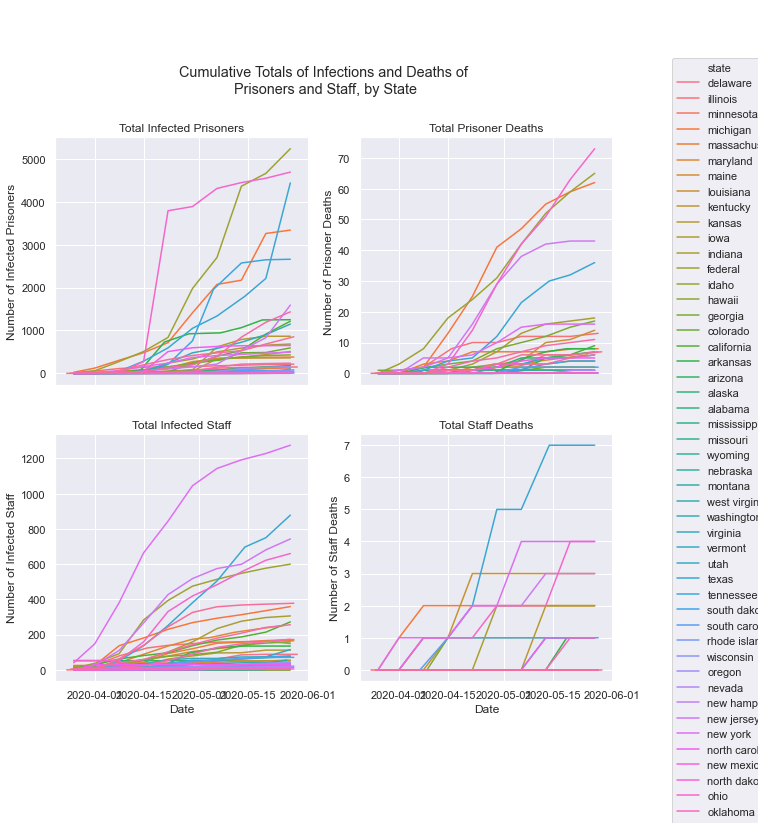

In [124]:
cum_vars_labels = [("total_prisoner_cases", "Number of Infected Prisoners", "Total Infected Prisoners"),
                   ("total_prisoner_deaths", "Number of Prisoner Deaths", "Total Prisoner Deaths"),
                   ("total_staff_cases", "Number of Infected Staff", "Total Infected Staff"),
                   ("total_staff_deaths", "Number of Staff Deaths", "Total Staff Deaths")]


## Plot Total Inmate and Staff Cases and Deaths over Time, by State
make_time_plot(df, cum_vars_labels, "state", 
               "Cumulative Totals of Infections and Deaths of \nPrisoners and Staff, by State")

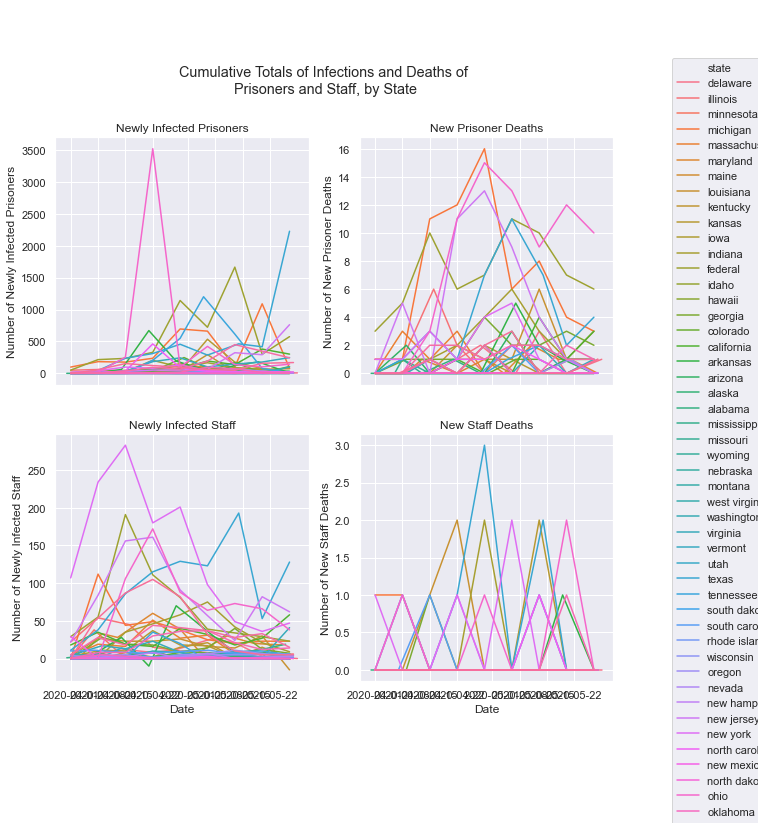

In [125]:
new_vars_labels = [("new_prisoner_cases", "Number of Newly Infected Prisoners", "Newly Infected Prisoners"),
                   ("new_prisoner_deaths", "Number of New Prisoner Deaths", "New Prisoner Deaths"),
                   ("new_staff_cases", "Number of Newly Infected Staff", "Newly Infected Staff"),
                   ("new_staff_deaths", "Number of New Staff Deaths", "New Staff Deaths")]

## Plot Total Inmate Cases over Time, by State
make_time_plot(df, new_vars_labels, "state", 
               "Cumulative Totals of Infections and Deaths of \nPrisoners and Staff, by State")

Based on the shape of the data, it looks like linear regression, polynomial regression may be good models to use. 

#### One-hot encode the state variable, to try and account for state fixed effects.

In [30]:
dataset = clean_data.one_hot_encode(df, ["state"])

#### Finally, sort the data by effective date, to get the data into time-series form.

In [31]:
dataset.sort_values(by='as_of_date', inplace=True)
dataset.index = range(len(df))


df.head(50)

,total_staff_cases,total_prisoner_cases,staff_recovered,prisoners_recovered,total_staff_deaths,total_prisoner_deaths,as_of_date,state,pop_2020,pop_2018,capacity,pct_occup,no_visits,lawyer_access,phone_access,video_access,no_volunteers,limiting_movement,screening,healthcare_support,new_staff_cases,new_prisoner_cases,new_staff_deaths,new_prisoner_deaths
0,0.0,0.0,53.0,132.0,0.0,0.0,2020-03-24,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN
1,0.0,0.0,53.0,132.0,0.0,0.0,2020-04-01,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0
2,6.0,2.0,53.0,132.0,0.0,0.0,2020-04-08,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,6.0,2.0,0.0,0.0
3,18.0,13.0,53.0,132.0,0.0,0.0,2020-04-15,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,12.0,11.0,0.0,0.0
4,26.0,41.0,53.0,132.0,0.0,1.0,2020-04-22,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,8.0,28.0,0.0,1.0
5,38.0,67.0,53.0,132.0,0.0,3.0,2020-04-28,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,12.0,26.0,0.0,2.0
6,64.0,125.0,53.0,132.0,0.0,3.0,2020-05-07,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,26.0,58.0,0.0,0.0
7,85.0,139.0,53.0,132.0,0.0,6.0,2020-05-13,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,21.0,14.0,0.0,3.0
8,88.0,141.0,53.0,132.0,0.0,6.0,2020-05-20,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,3.0,2.0,0.0,0.0
9,88.0,148.0,53.0,132.0,0.0,7.0,2020-05-29,delaware,5582.0,5582.0,5566.0,1.002875,1,1,1,0,0,0,0,0,0.0,7.0,0.0,1.0


#### The data is now sorted by effective date, and ready to be split temporally for training, testing, and cross-validation. 

In [32]:
split_loc = round(len(dataset) * .8)
print(split_loc)

408


In [33]:
train, test = dataset.iloc[:split_loc, :].copy(), dataset.iloc[split_loc:len(df), :].copy()

print("The train shape is", train.shape)
print("The test shape is", test.shape)

The train shape is (408, 74)
The test shape is (102, 74)
